Criterios para la Selección de Proyectos Individuales
===

Notas de clase sobre ingeniería economica avanzada usando Python

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia  

**Software utilizado**
>Este es un documento interactivo escrito como un notebook de [Jupyter](http://jupyter.org/) , en el cual se presenta un tutorial sobre finanzas corporativas usando Python. Los notebooks de Jupyter permiten incoporar simultáneamente código, texto, gráficos y ecuaciones. El código presentado en este notebook puede ejecutarse en los sistemas operativos Linux y OS X.  

>Haga click [aquí](https://github.com/jdvelasq/guias-de-instalacion) para obtener instrucciones detalladas sobre como instalar Jupyter en Windows y Mac OS X.

>Descargue la última versión de este documento a su disco duro; luego, carguelo y ejecutelo en línea en Try [Jupyter!](https://try.jupyter.org/)



#### Contenido

>

**Bibliografía**

> * [1] SAS/ETS 14.1 User's Guide, 2015.   
* [2] **hp** 12c platinum financial calculator. User's guide. 
* [3] HP Business Consultant II Owner's manual.
* [4] C.S. Park and G.P. Sharp-Bette. Advanced Engineering Economics. John Wiley & Sons, Inc., 1990.

# Criterios para la selección de proyectos individuales

## Criterio del valor presente neto 

<img src="images/vpn.png" width=850>

**Criterio del valor presente.**

$$PV(r) = \sum_{t=0}^N \frac{F_t}{(1+r)^t}$$

* Si $PV(r) > 0$, acepte.

* Si $PV(r) = 0$, indiferencia.

* Si $PV(r) < 0$, rechace.

**Criterio del valor futuro.**

$$FV(r) = \sum_{t=0}^N \frac{F_t}{(1+r)^{N-t}}$$

* Si $FV(r) > 0$, acepte.

* Si $FV(r) = 0$, indiferencia.

* Si $FV(r) < 0$, rechace.

**Criterio del equivalente uniforme periodico.**

$$UPE(r) = PV(r) * \frac{r * (1+r)^N}{(1+r)^N-1}$$

* Si $UPE(r) > 0$, acepte.

* Si $UPE(r) = 0$, indiferencia.

* Si $UPE(r) < 0$, rechace.

**Nota 1.** $r$ es la MARR y puede variar de periodo a periodo

**Nota 2.** El $PV(r)$ representa el excedente que se gana sobre la alternativa de invertir a una tasa de $r$.

**Ejemplo.--** Calcule los indicadores para el siguiente flujo de efectivo, si la tasa de descuento es del 10%.

<img src="images/diagrama-vpn.png" width=550>

In [1]:
import cashflow as cf

In [2]:
x = cf.Cashflow(5, spec = [(0, -1000),
                           (1,   400),
                           (2,   360),
                           (3,   320),
                           (4,   280),
                           (5,   240)])
x

  time                Values
-----------------------------
  0                 -1000.00
  1                   400.00
  2                   360.00
  3                   320.00
  4                   280.00
  5                   240.00

In [3]:
cf.npv(rate = 0.1, x = x)  ## R/ $ 281.84

241.84264611831014

In [4]:
cf.npv(rate = 0.1, x = x, t0 = 5)  ## R/ $ 389.49

389.4899999999999

In [5]:
cf.nus(rate = 0.1, x = x, nper = 5)  ## R/ $ 58.00

63.79748079474534

In [6]:
## la función npv puede recibir simultaneamente varios flujos de efectivo
cf.npv(0.1, [x, x, x])

[241.84264611831014, 241.84264611831014, 241.84264611831014]

In [7]:
## o varias tasas de interes
cf.npv([0.1, 0.2, 0.3], x)

[241.84264611831014, 1.5631940186722204e-13, -170.96201652064556]

In [8]:
## o una tasa de descuento para cada flujo de efectivo
cf.npv([0.1, 0.2, 0.3], [x, x, x])

[241.84264611831014, 1.5631940186722204e-13, -170.96201652064556]

In [9]:
# puede calcular el npv para un instante de tiempo diferente del cero
cf.npv([0.1, 0.2, 0.3], [x, x, x], t0 = 2)

[292.6296018031552, 2.8421709430404007e-13, -288.925807919891]

In [10]:
## la funcion table imprime en formato de tabla 
## para facilitar la comparación entre alternativas
cf.table(cf.npv([0.1, 0.2, 0.3], x))

 #               Value    
------------------------
 0            241.8426
 1              0.0000
 2           -170.9620


## Criterio de la tasa interna de retorno

**Tasa Interna de Retorno (IRR)**.

$r^*$ -- tasa interna de retorno (irr). Es la tasa que hace el valor presente igual a cero.

$$PV(r^*) = \sum_{t=0}^N \frac{F_t}{(1+r^*)^t} ~=~0$$

**Ejemplo.--** Calcule la irr para el ejemplo anterior.

In [11]:
cf.irr(x)

0.20000000000000018

**Tasa Interna de Retorno Modificada**.

<img src="images/mirr.png" width=650>

$$(1+MIRR)^N = \frac{\sum_{t=0}^N \max(F_t,0) * (1+r_1)^{N-t} }{ \sum_{t=0}^N \min(F_t,0) * (1+r_2)^{-t} }$$

$r_1$ -- tasa de reinversión.   
$r_2$ -- tasa de financiamiento.

In [12]:
cf.mirr(x, finance_rate = 0.1, reinvest_rate = 0.15)

0.17422464912777702

In [13]:
## la función puede recibir varios flujos de fondos simulataneamente.
cf.irr([x, x, x])

[0.20000000000000018, 0.20000000000000018, 0.20000000000000018]

In [14]:
cf.mirr([x, x, x], finance_rate = 0, reinvest_rate = 0)

[0.098560543306117854, 0.098560543306117854, 0.098560543306117854]

# Relación Beneficio - Costo.

<img src="images/relacionBC.png" width=650>

In [15]:
cf.bca(rate = 0.2, x = x)

1.0000000000000002

In [16]:
cf.bca(0.1, [x, x, x])

[1.24184264611831, 1.24184264611831, 1.24184264611831]

In [17]:
cf.bca([0.1, 0.2, 0.3], x)

[1.24184264611831, 1.0000000000000002, 0.8290379834793543]

In [18]:
cf.bca([0.1, 0.2, 0.3], [x, x, x])

[1.24184264611831, 1.0000000000000002, 0.8290379834793543]

In [19]:
cf.table(cf.bca(0.1, [x, x, x]))

 #               Value    
------------------------
 0              1.2418
 1              1.2418
 2              1.2418


# Análisis de sensibilidad

Se realiza variando una de las variables del problema para determinar el efecto en el indicador utilizado.

**Ejemplo.--** Se tiene un proyecto con la siguiente información:

* Años de operación: 10

* Años de construcción: 1

* Producción: 1000 unidades por año

* Precio de venta: \$ 10 por unidad

* Costos operativos: \$ 220 por año

* Costos de inversión: \$ 2000 depreciables a 10 años.

* MARR = 10%

* Impuesto de renta: 30%

Construya la gráfica de sensibilidad del npv a la producción, el precio de venta y la inversión.

In [20]:
## se construye una función que recibe la información relevante y retorn el npv

def project(marr,
            produccion, 
            precio, 
            costo,
            inversion):
    
    ingre = cf.Cashflow(10, spec = [(t, precio * produccion) if t > 0 else (0,0) for t in range(11)])    
    opera = cf.Cashflow(10, spec = [(t, costo)               if t > 0 else (0,0) for t in range(11)])
    inver = cf.Cashflow(10, spec = (0, inversion))
    dep   = cf.Depreciation(assetsdata = [(inversion, 0, 10, 0 )], method   = 'SL').depreciation()
    
    antes = ingre - opera - inver - dep
    desp  = cf.afterTaxCashflow(antes, 0.30)
    
    neto  = antes + dep
    
    npv   = cf.npv(marr, neto)
    
    return npv

In [21]:
project(0.1, 100, 10, 220, 2000)

5250.589184731523

In [22]:
## resultados para diferentes valores de la MARR
project([0.08, 0.10, 0.12], 100, 10, 220, 2000)

[5917.8960507509, 5250.589184731523, 4667.263173524819]

In [23]:
## resultados para diferentes valores de la inversión
[project(0.10, 100, 10, 220, x) for x in [1600, 1800, 2000, 2200, 2400]]

[5159.023816275148,
 5204.806500503335,
 5250.589184731523,
 5296.371868959711,
 5342.154553187897]

In [24]:
## resultados para diferentes valores del precio
[project(0.10, 100, x, 220, 2000) for x in [8, 9, 10, 11, 12]]

[4021.675763590587,
 4636.132474161054,
 5250.589184731523,
 5865.045895301991,
 6479.502605872459]

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
precio = [8, 9, 10, 11, 12]
y = [project(0.10, 100, x, 220, 2000) for x in precio]

[8, 9, 10, 11, 12]

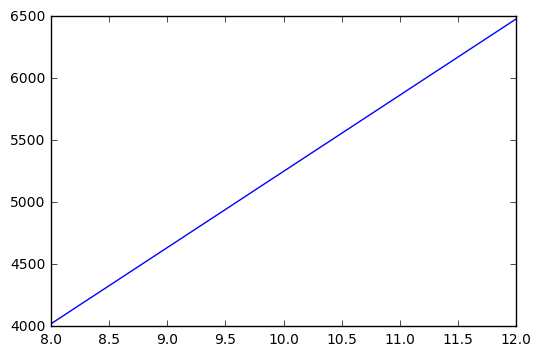

In [42]:
plt.plot(precio, y)

---

**Ejercicio.--** Haga sensibilidades al costo y a la producción, y grafíquelas.

---

[Contenido](#Contenido)